In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Any results you write to the current directory are saved as output.

['WorldCups.csv', 'WorldCupMatches.csv', 'WorldCupPlayers.csv']


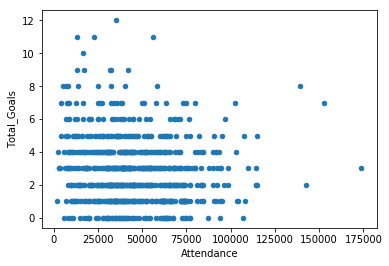

In [11]:
matches  = pd.read_csv("../input/WorldCupMatches.csv")
players = pd.read_csv("../input/WorldCupPlayers.csv")

#removing duplicate rows for match id column 
matches = matches.drop_duplicates(subset="MatchID",keep="first")

#removing null values
matches = matches[matches["Year"].notnull()]
matches = matches[matches["Attendance"].notnull()]
#matches.head(5)

Total_Goals = matches['Home Team Goals'].astype(int) + matches['Away Team Goals'].astype(int)
Total_Goals_df = pd.DataFrame(Total_Goals)
Total_Goals_df.rename(columns = {0: 'Total_Goals'},inplace=True)
Attendance = matches['Attendance'].astype(int)
data = pd.concat([Total_Goals_df,Attendance],axis=1)

data.plot.scatter(y='Total_Goals',x='Attendance')

In [12]:
matches.head()
ref_names = matches["Referee"].str.split("(").str[0]
ref_surnames = ref_names.str.split(" ").str[0]

wrds = ref_surnames.value_counts().keys()

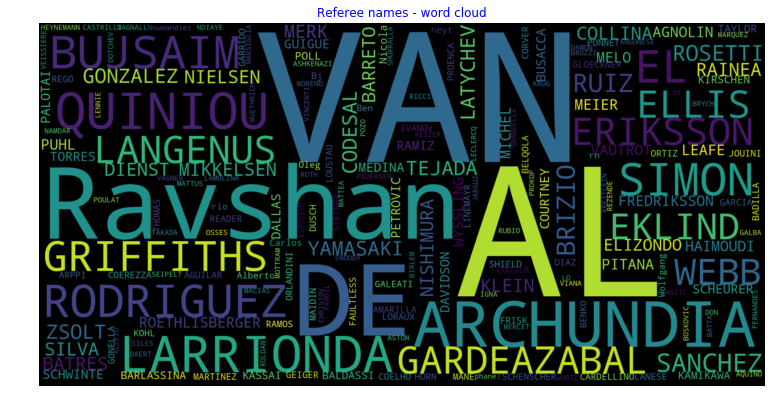

In [14]:
wc = WordCloud(scale=5,max_words=1000,colormap="rainbow").generate(" ".join(wrds))
plt.figure(figsize=(13,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Referee names - word cloud",color='b')
plt.show()